# Q2c -  Fit a logistic regression model for the probability of diverted US flights using as many features as possible.
# Visualize the coefficients across years.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.metrics import RocCurveDisplay  # Changed from plot_roc_curve to RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## Reading in the files

In [10]:
df_2004 = pd.read_csv ('2004.csv.bz2')
df_2005 = pd.read_csv ('2005.csv.bz2')
df_2006 = pd.read_csv ('2006.csv.bz2')
df_2007 = pd.read_csv ('2007.csv.bz2')
df_2008 = pd.read_csv ('2008.csv.bz2')

## Features

In [12]:
df_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [13]:
import pandas as pd
# diverted count 
diverted_04 = df_2004['Diverted'].value_counts()
diverted_05 = df_2005['Diverted'].value_counts()
diverted_06 = df_2006['Diverted'].value_counts()
diverted_07 = df_2007['Diverted'].value_counts()
diverted_08 = df_2008['Diverted'].value_counts()
print (diverted_04, diverted_05, diverted_06, diverted_07, diverted_08)

Diverted
0    7115486
1      13784
Name: count, dtype: int64 Diverted
0    7126568
1      14028
Name: count, dtype: int64 Diverted
0    7125736
1      16186
Name: count, dtype: int64 Diverted
0    7436036
1      17179
Name: count, dtype: int64 Diverted
0    2383563
1       5654
Name: count, dtype: int64


### 2004

In [15]:
features_2004 = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                  'FlightNum','TailNum','Origin','Dest','Distance','CRSElapsedTime']
# Omitted: 
# ActualElapsedTime, Cancelled, CancellationCode, Diverted, 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay','DepDelay'
# 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn','TaxiOut'

numerical_features = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance','CRSElapsedTime']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['UniqueCarrier','FlightNum','TailNum','Origin','Dest']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actually setting up the regression model
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

X_initial_2004 = df_2004[features_2004]
y = df_2004['Diverted']

X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_initial_2004, y, test_size=0.5,random_state=1)

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train_2004, y_train_2004);

## Overlaying receivers operating characteristic (ROC) curves.

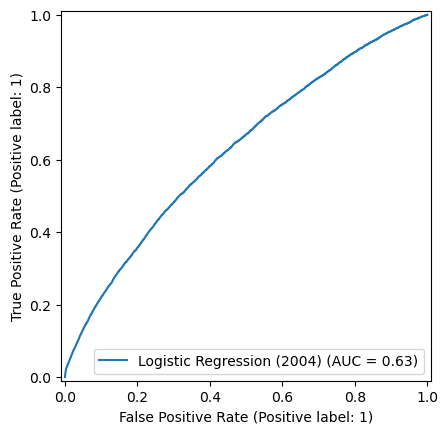

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml  #using openml to import data
from sklearn.metrics import RocCurveDisplay  # Changed from plot_roc_curve to RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, X_test_2004, y_test_2004, ax=ax, name='Logistic Regression (2004)')
plt.savefig("Logistic Regression (2004)")
plt.show()

## 2005

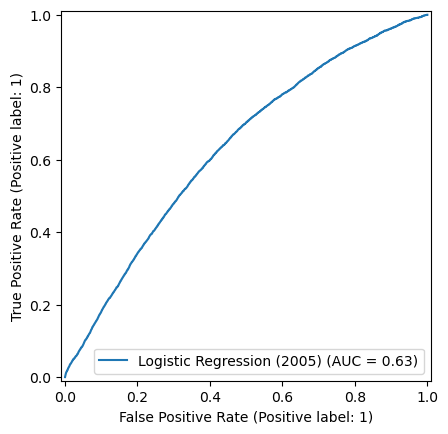

In [43]:
features_2005 = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                  'FlightNum','TailNum','Origin','Dest','Distance','CRSElapsedTime']
# Omitted: 
# ActualElapsedTime, Cancelled, CancellationCode, Diverted, 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay','DepDelay'
# 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn','TaxiOut'

numerical_features = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance','CRSElapsedTime']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])
categorical_features = ['UniqueCarrier','FlightNum','TailNum','Origin','Dest']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actually setting up the regression model
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

X_initial_2005 = df_2005[features_2005]
y = df_2005['Diverted']

X_train_2005, X_test_2005, y_train_2005, y_test_2005 = train_test_split(X_initial_2005, y, test_size=0.5,random_state=1)

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train_2005, y_train_2005);

# Visualisation
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, X_test_2005, y_test_2005, ax=ax, name='Logistic Regression (2005)')
plt.savefig("Logistic Regression (2005)")
plt.show()

## 2006

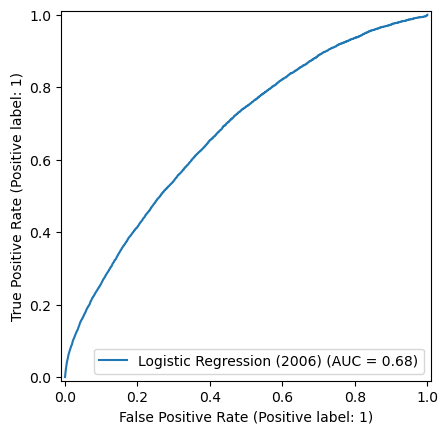

In [44]:
features_2006 = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                  'FlightNum','TailNum','Origin','Dest','Distance','CRSElapsedTime']
# Omitted: 
# ActualElapsedTime, Cancelled, CancellationCode, Diverted, 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay','DepDelay'
# 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn','TaxiOut'

numerical_features = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance','CRSElapsedTime']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])
categorical_features = ['UniqueCarrier','FlightNum','TailNum','Origin','Dest']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actually setting up the regression model
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

X_initial_2006 = df_2006[features_2006]
y = df_2006['Diverted']

X_train_2006, X_test_2006, y_train_2006, y_test_2006 = train_test_split(X_initial_2006, y, test_size=0.5,random_state=1)

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train_2006, y_train_2006);

# Visualisation
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, X_test_2006, y_test_2006, ax=ax, name='Logistic Regression (2006)')
plt.savefig("Logistic Regression (2006)")
plt.show()

## 2007

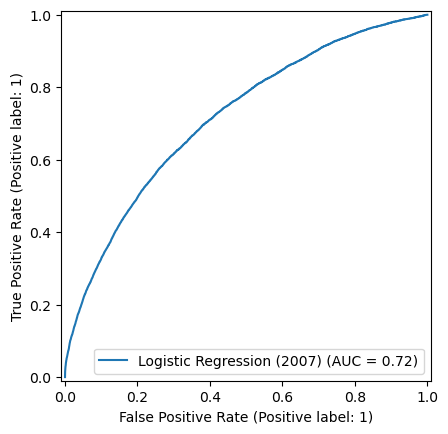

In [45]:
features_2007 = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                  'FlightNum','TailNum','Origin','Dest','Distance','CRSElapsedTime']
# Omitted: 
# ActualElapsedTime, Cancelled, CancellationCode, Diverted, 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay','DepDelay'
# 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn','TaxiOut'

numerical_features = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance','CRSElapsedTime']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])
categorical_features = ['UniqueCarrier','FlightNum','TailNum','Origin','Dest']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actually setting up the regression model
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

X_initial_2007 = df_2007[features_2007]
y = df_2007['Diverted']

X_train_2007, X_test_2007, y_train_2007, y_test_2007 = train_test_split(X_initial_2007, y, test_size=0.5,random_state=1)

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train_2007, y_train_2007);

# Visualisation
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, X_test_2007, y_test_2007, ax=ax, name='Logistic Regression (2007)')
plt.savefig("Logistic Regression (2007)")
plt.show()

## 2008

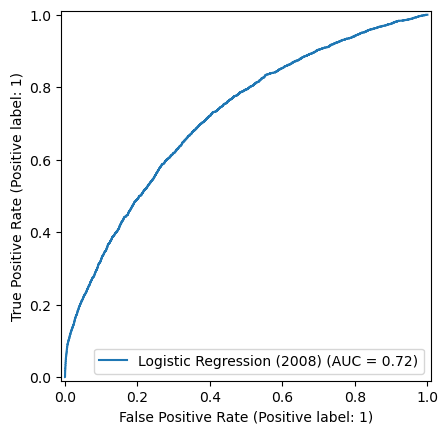

In [46]:
features_2008 = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','UniqueCarrier',
                  'FlightNum','TailNum','Origin','Dest','Distance','CRSElapsedTime']
# Omitted: 
# ActualElapsedTime, Cancelled, CancellationCode, Diverted, 'DepTime', 'ArrTime', 'AirTime', 'ArrDelay','DepDelay'
# 'CarrierDelay','WeatherDelay','NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TaxiIn','TaxiOut'

numerical_features = ['Year','Month','DayofMonth','DayOfWeek','CRSDepTime','CRSArrTime','Distance','CRSElapsedTime']

# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])
categorical_features = ['UniqueCarrier','FlightNum','TailNum','Origin','Dest']

# Applying SimpleImputer and then OneHotEncoder into another pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Actually setting up the regression model
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)]) 

pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000))])

X_initial_2008 = df_2008[features_2008]
y = df_2008['Diverted']

X_train_2008, X_test_2008, y_train_2008, y_test_2008 = train_test_split(X_initial_2008, y, test_size=0.5,random_state=1)

param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train_2008, y_train_2008);

# Visualisation
ax = plt.gca()
RocCurveDisplay.from_estimator(grid_lr, X_test_2008, y_test_2008, ax=ax, name='Logistic Regression (2008)')
plt.savefig("Logistic Regression (2008)")
plt.show()